# Predicting House Prices: 
### Using Exploratory Data Analysis and Linear Regression Modeling


In this project we will analyze a housing dataset and build a predictive model that estimates house prices based on key features.

In [89]:
# importiong the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
# loading the dataset

df = pd.read_csv('C:/Users/Shahrukh/python/data sets/House-price-prediction-with-linear-regression.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## About the features of the dataset



 - 'price': The price of the house (target variable).
 - 'area': The area or size of the house in square feet.
 - 'bedrooms': The number of bedrooms in the house.
 - 'bathrooms': The number of bathrooms in the house.
 - 'stories': The number of stories or floors in the house.
 - 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
 - 'guestroom': Categorical variable indicating whether the house has a guest room or not.
 - 'basement': Categorical variable indicating whether the house has a basement or not.
 - 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
 - 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
 - 'parking': The number of parking spaces available with the house.
 - 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
 - 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [92]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 - there are no null values

In [93]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## EDA

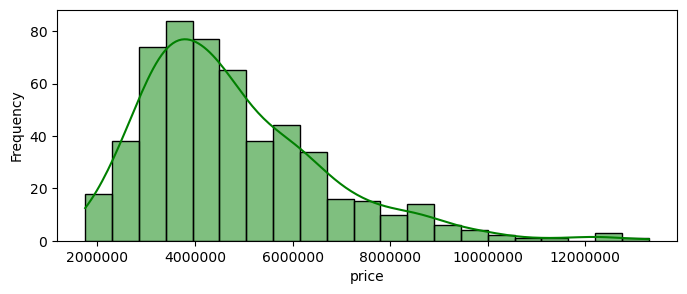

In [94]:
# Histogram of price


plt.figure(figsize=(8,3))
sns.histplot(df['price'],kde=True,color='green')
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('Frequency')
plt.show()

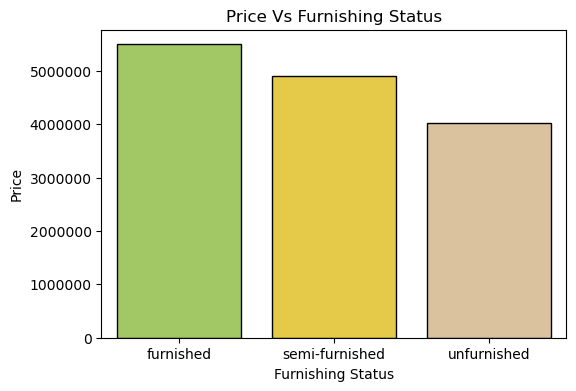

In [95]:
# prive Vs furnishing status


plt.figure(figsize=(6,4))
sns.barplot(x=df['furnishingstatus'],y=df['price'],data=df,palette=sns.color_palette('Set2')[4:7],ci=None,edgecolor='black')
plt.title('Price Vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

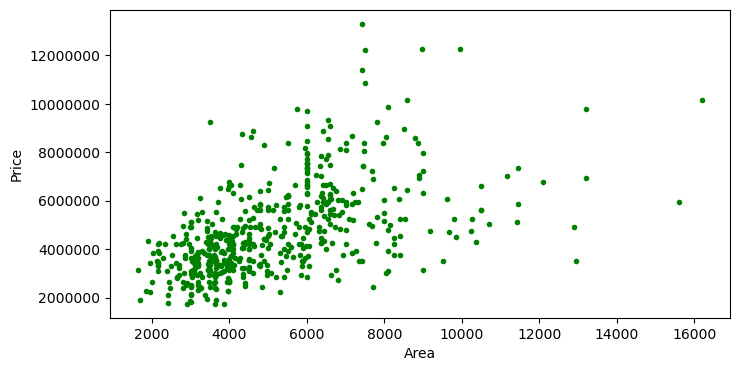

In [96]:
# Scatter plot of 'area' vs. 'price'


plt.figure(figsize=(8,4))
plt.scatter(x=df['area'],y=df['price'],color='green',marker='.')
plt.xlabel('Area')
plt.ylabel('Price')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

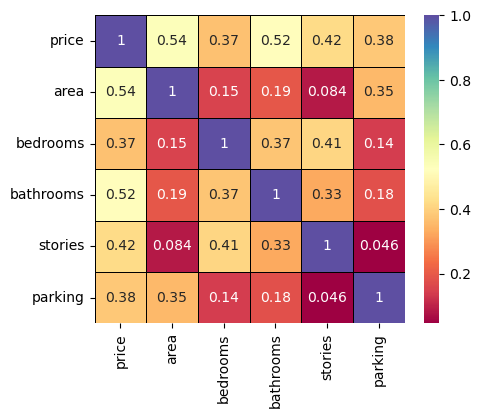

In [97]:
# Heatmap of correlation matrix


plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',linecolor='black',linewidths=0.7)
plt.show()

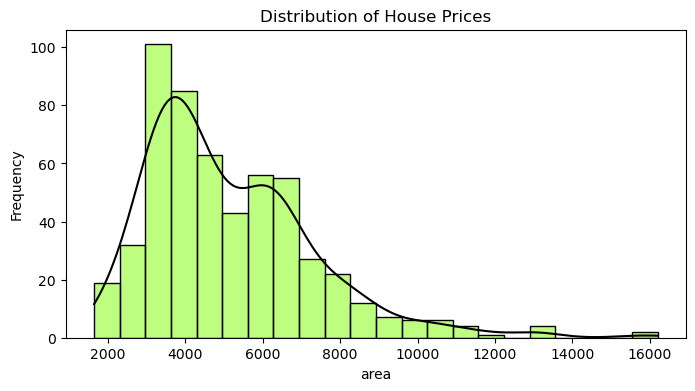

In [98]:
# Density Plot of 'area'

plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['area'],kde=True,color='lawngreen')
ax.lines[0].set_color('black')
plt.title('Distribution of House Prices')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [99]:
# handelling categorical columns

df.select_dtypes('object').columns.to_list()

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

## Label Encoding Categorical columns 

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df[['mainroad','guestroom','basement','hotwaterheating'
    ,'airconditioning','prefarea','furnishingstatus']] = df[['mainroad','guestroom','basement','hotwaterheating'
                                                             ,'airconditioning','prefarea',
                                                             'furnishingstatus']].apply(le.fit_transform)

## Splitting data into Training and Testing data

In [101]:
from sklearn.model_selection import train_test_split
train_df,test_df =train_test_split(df,test_size=0.2,random_state=42)

## Scaling Training Data using MinMaxScaler

In [102]:
# columns to scale
col_to_scale = ['price','area']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_df[col_to_scale] = scaler.fit_transform(train_df[col_to_scale])
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.550000,0.298969,3,2,4,1,0,0,0,1,1,0,0
93,0.433333,0.381443,3,2,1,1,0,1,0,1,3,0,1
335,0.206667,0.148866,2,1,1,1,0,1,0,1,2,0,0
412,0.160000,0.065979,3,1,2,1,0,1,0,0,0,1,2
471,0.120000,0.144330,3,1,2,1,0,0,0,0,0,0,2


## Scaling Test Data using MinMaxScaler

In [103]:
test_df[col_to_scale] = scaler.fit_transform(test_df[col_to_scale])
test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.200000,0.365217,4,2,2,0,0,1,0,0,1,0,2
77,0.424242,0.417391,3,2,3,1,0,0,0,1,0,1,0
360,0.169697,0.203478,2,1,1,1,0,0,0,0,0,0,1
90,0.406061,0.286957,3,1,2,1,0,0,0,1,0,0,1
493,0.090909,0.196522,3,1,1,1,0,0,0,0,0,0,0


## Training the model

In [104]:
# Separating the target variable from the training dataset
x_train = train_df.drop(columns='price',axis=1)
y_train = train_df['price']

# Separating the target variable from the test dataset
x_test = test_df.drop(columns='price',axis=1)
y_test = test_df['price']

## Fitting the Linear Regression model to the training data

In [105]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

regressor.score(x_train,y_train)

0.6854429472843789

## Checking R squared value

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6402640755838119

## Comparing the actual and predicted values

In [107]:
# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1,1)

In [108]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual':y_test_matrix.flatten(),'predicted':y_pred.flatten()})
data_frame.head(10)

,actual,predicted
0,0.200000,0.352820
1,0.424242,0.551948
2,0.169697,0.137848
3,0.406061,0.286116
4,0.090909,0.163096
5,0.272727,0.201457
6,0.303030,0.410502
7,0.241818,0.462665
8,0.060606,0.103845
9,0.138788,0.092352


## Plotting the Graph

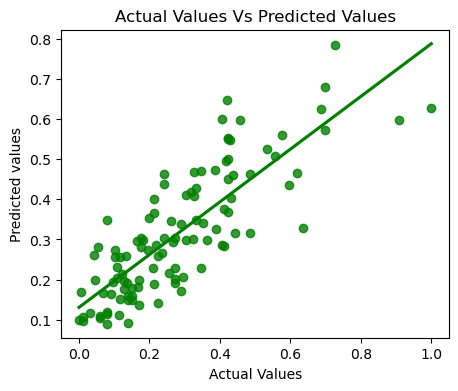

In [110]:
plt.figure(figsize=(5,4))
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual Values Vs Predicted Values')
plt.show()

## Conclusion


In this project, we performed an in-depth Exploratory Data Analysis (EDA) on a house price dataset and built a linear regression model to predict house prices.

We loaded and preprocessed the data, explored correlations and relationships using visualizations, selected relevant features based on EDA insights, built and trained a linear regression model, and evaluated its performance.

The linear regression model showed promise in predicting house prices based on the selected features.

However, there is still room for improvement.

Further steps could involve trying different regression algorithms, fine-tuning hyperparameters, and engineering new features for better performance.

EDA and feature selection played a crucial role in understanding the data and building an initial predictive model.

Thank You!!!